In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
'''
sujet: [classification] Déterminer si une personne atteintes de maladies cardiovasculaire  va  
mourir ou pas en fonction de ses antécédent (fumeur ou pas, diabète ou pas, hyper-tension ou pas...)

'time' très corrélé avec 'DEATH_EVENT' => a supprimer 

11 features => 2 labels : DEAD / SURVIVE
'''

dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')


In [2]:
dataset.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [3]:
dataset.head(300) 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
dataset.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

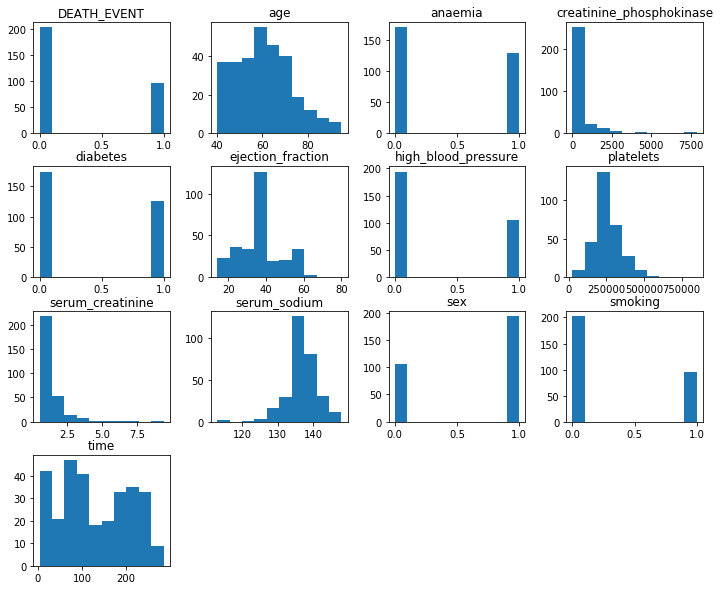

In [5]:
dataset.hist(bins=10,figsize=(12,10),grid=False);

In [6]:
dataset.info()  #aucune valeur null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
dataset.shape

(299, 13)

In [8]:
dataset.describe(include = 'all') # age: Age
                                # anaemia: Decrease of red blood cells or hemoglobin (boolean)
                                # creatinine_phosphokinase : Level of the CPK enzyme in the blood (mcg/L)
                                # diabetes : If the patient has diabetes (boolean)
                                # ejection_fraction : Percentage of blood leaving the heart at each contraction (percentage)
                                # high_blood_pressure : If the patient has hypertension (boolean)
                                # platelets : Platelets in the blood (kiloplatelets/mL)
                                # serum_creatinine : Level of serum creatinine in the blood (mg/dL)
                                # serum_sodium : Level of serum sodium in the blood (mEq/L)
                                # sex : Woman or man (binary)
                                # smoking : If the patient smokes or not (boolean)
                                # time : Follow-up period (days)
                                # DEATH_EVENT : If the patient deceased during the follow-up period (boolean)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [9]:
#Probablement besoin d'uniformiser les données car il y a des ratio de 0 à 1 et des valeurs énormes à coté

"\n'time' et 'death_event'  :  tres corrélé\n'sex' et 'smoking'       :  corrélé\n\n"

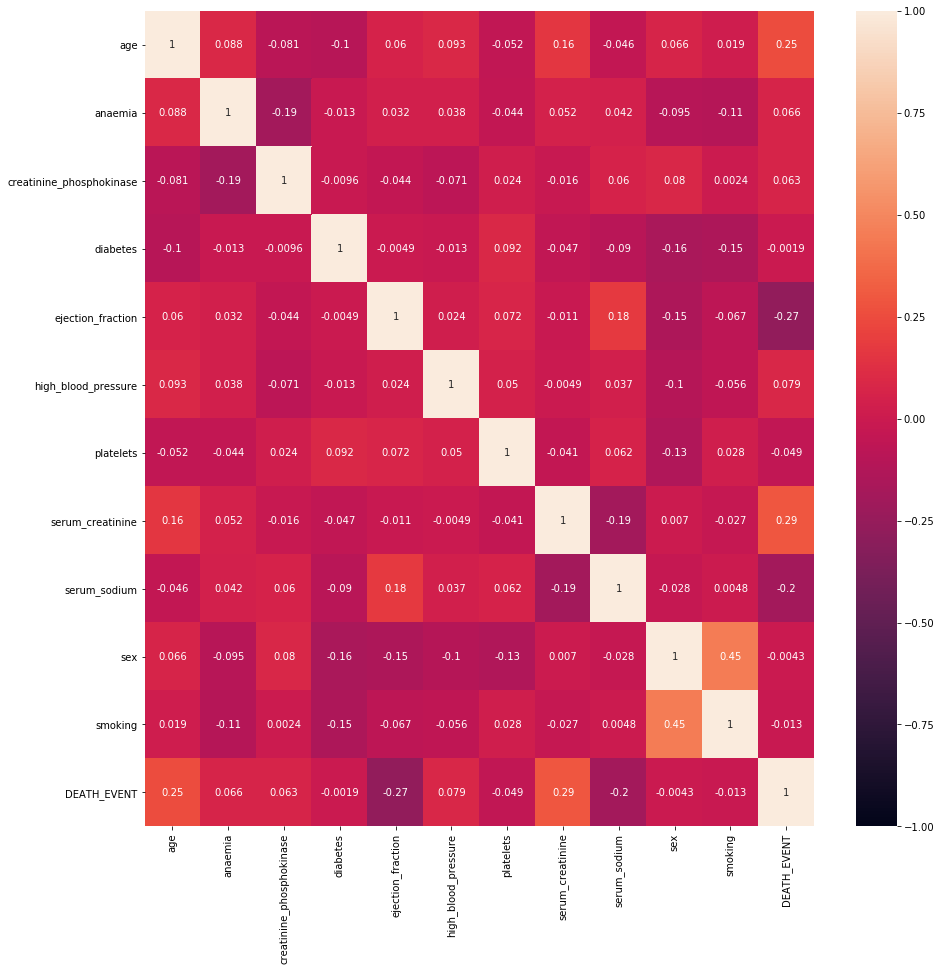

In [29]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(), vmin=-1, annot=True);
'''
'time' et 'death_event'  :  tres corrélé
'sex' et 'smoking'       :  corrélé

'''
## mais 'sex' et 'smoking' reste une information importante car 
## fumer peut avoir des conséquences sur la santé d'un patient

In [11]:
#'TIME' corréleé avec 'DEATH_EVENT' ?  => verifions  
le_temps = []
score_temps = []
for i in range(dataset['time'].min(),dataset['time'].max()+1):
    score_res= 100*np.mean((dataset['time'].to_numpy() < i) == dataset['DEATH_EVENT'].to_numpy())
    print('%i : %.2f'%(i,score_res))
    le_temps.append(i)
    score_temps.append(score_res)


4 : 67.89
5 : 68.23
6 : 68.23
7 : 68.56
8 : 69.23
9 : 69.90
10 : 69.90
11 : 71.91
12 : 72.58
13 : 72.24
14 : 72.58
15 : 73.24
16 : 73.91
17 : 73.58
18 : 73.58
19 : 73.58
20 : 73.58
21 : 74.25
22 : 74.25
23 : 73.91
24 : 74.58
25 : 74.92
26 : 74.92
27 : 75.92
28 : 76.25
29 : 76.92
30 : 76.92
31 : 77.93
32 : 78.26
33 : 78.60
34 : 78.93
35 : 78.93
36 : 79.26
37 : 79.26
38 : 79.26
39 : 79.60
40 : 79.60
41 : 79.93
42 : 80.27
43 : 80.60
44 : 81.61
45 : 81.94
46 : 82.27
47 : 82.27
48 : 82.27
49 : 82.27
50 : 82.27
51 : 82.61
52 : 82.61
53 : 82.61
54 : 82.61
55 : 81.94
56 : 82.27
57 : 82.27
58 : 82.27
59 : 82.27
60 : 82.61
61 : 82.94
62 : 83.28
63 : 83.28
64 : 82.94
65 : 83.28
66 : 83.95
67 : 84.28
68 : 84.62
69 : 84.28
70 : 84.28
71 : 84.28
72 : 83.95
73 : 83.95
74 : 84.62
75 : 83.28
76 : 82.94
77 : 82.61
78 : 82.94
79 : 82.94
80 : 81.27
81 : 80.60
82 : 80.60
83 : 80.60
84 : 79.60
85 : 79.60
86 : 78.93
87 : 78.60
88 : 76.92
89 : 75.92
90 : 75.92
91 : 75.92
92 : 75.25
93 : 75.25
94 : 75.25
95 : 

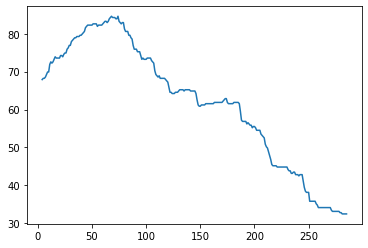

In [12]:
plt.plot(le_temps,score_temps)
## on voit la courbe atteint un pic à 84% ce qui signifie que la majorité 
## des patients sont mort avant le 'time' (jour) 74.
## le feature 'time' et bien corrélé à notre label 'DEATH_EVENT'
## De plus on ne cheche pas à prédire le jour où le patient est mort
## mais prédire si il va mourir où pas


In [13]:
# On decide donc de supprimer time 

dataset.drop('time', axis=1, inplace=True)

dataset.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


<h2> L'AGE un indicateur de mort </h2>

In [16]:

dataset['age']= dataset['age'].astype(int) # convertit age floattant en int
mort_l=dataset["DEATH_EVENT"]
age_l = dataset["age"]  
sex_l = dataset["sex"]
diabete_l = dataset["diabetes"]
anemie_l = dataset["anaemia"]
tout_les_ages= dataset['age']

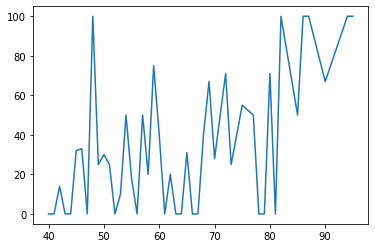

In [17]:
l_age_res = []
l_moy_res= []
for i in np.unique(tout_les_ages): 
    age_t = dataset['age'] ==i
    moy = round(100*np.mean(dataset['DEATH_EVENT'][age_t]))
    l_age_res.append(i)
    l_moy_res.append(moy)
    #print("age = ", i ," score Mort= ", moy, "nb pers = ", np.sum(age_t))
plt.plot(l_age_res, l_moy_res)

## pas vraiment significatif car le nombre de patient
## n'est pas le meme pour deux ages différents
#ex: 2 patients qui ont 48 ans et les 2 sont mort
##  vs 35 patients pour 60 ans


<h2> Verifions si le SEX un indicateur de mort </h2>

In [18]:
homme = dataset['sex']==1
femme = dataset['sex'] ==0
homme_morts = dataset['DEATH_EVENT'][homme] == 1
femme_morts= dataset['DEATH_EVENT'][femme] == 1
homme_vivants = dataset['DEATH_EVENT'][homme] == 0
femme_vivantes = dataset['DEATH_EVENT'][femme] == 0
#print("nb Homme =", np.sum(homme) ,"nb Femme = ", np.sum(femme))
#print("nb Homme morts =", np.sum(homme_morts) ,"nb Femme morts = ", np.sum(femme_morts))

#print("nb Homme =", np.sum(homme) ,"nb Femme = ", np.sum(femme))
#print("nb Homme morts =", np.sum(homme_morts) ,"nb Femme morts = ", np.sum(femme_morts))


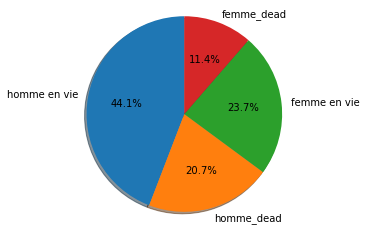

In [19]:
#petite représentation
labels = 'homme en vie', 'homme_dead', 'femme en vie', 'femme_dead' 
sizes = [np.sum(homme_vivants), np.sum(homme_morts),np.sum(femme_vivantes),np.sum(femme_morts)]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.show()

#A commenter

<h2> Verifions si le DIABETE un indicateur de mort </h2>

In [20]:
les_diabetiques = dataset['diabetes'] == 1
les_non_diabetiques = dataset['diabetes'] == 0
diabetes_mort = dataset['DEATH_EVENT'][les_diabetiques]  == 1 
non_diabetique_mort = dataset['DEATH_EVENT'][les_non_diabetiques]  == 1
diabetes_vivant = dataset['DEATH_EVENT'][les_diabetiques]  == 0
non_diabetique_vivant = dataset['DEATH_EVENT'][les_non_diabetiques]  == 0



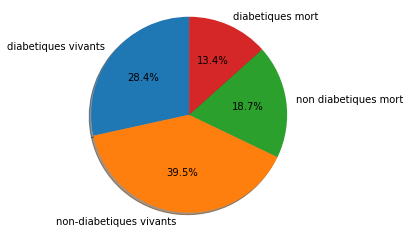

(2.125, 2.107142857142857)

In [21]:
#petite représentation
labels = 'diabetiques vivants', 'non-diabetiques vivants', 'non diabetiques mort' , 'diabetiques mort'
sizes = [np.sum(diabetes_vivant), np.sum(non_diabetique_vivant),np.sum(non_diabetique_mort),np.sum(diabetes_mort)]

plt.pie(sizes, labels=labels,  autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.show()

#A commenter
np.sum(diabetes_vivant)/np.sum(diabetes_mort),np.sum(non_diabetique_vivant)/ np.sum(non_diabetique_mort)

<h2> Verifions si l'anémie est indicateur de mort</h2>

In [22]:
anemie_true = dataset["anaemia"] ==1
anemie_false = dataset["anaemia"]  ==0
anemia_mort = dataset['DEATH_EVENT'][anemie_true] == 1
non_anemia_mort = dataset['DEATH_EVENT'][anemie_false] == 1
anemia_vivant = dataset['DEATH_EVENT'][anemie_true] == 0
non_anemia_vivant = dataset['DEATH_EVENT'][anemie_false] == 0

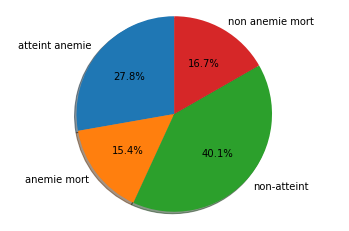

(1.8043478260869565, 2.4)

In [23]:
#petite représentation
labels = 'atteint anemie', 'anemie mort', 'non-atteint','non anemie mort'
sizes = [np.sum(anemia_vivant), np.sum(anemia_mort),np.sum(non_anemia_vivant),np.sum(non_anemia_mort)]

plt.pie(sizes, labels=labels,  autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.show()

#A commenter
## 11.6 % des 32.7% sont mort atteint d'anemie
## 12.7 % des 43.0% sont mort non atteint d'anemie
np.sum(anemia_vivant)/np.sum(anemia_mort),np.sum(non_anemia_vivant)/ np.sum(non_anemia_mort)

<h2> Avoir une pression artériel élévé (high_blood_pressure) indicateur de mort :  </h2>

In [24]:
hpb_true = dataset["high_blood_pressure"] ==1
hpb_false = dataset["high_blood_pressure"]  ==0
hpb_mort = dataset['DEATH_EVENT'][hpb_true] == 1
non_hpb_mort = dataset['DEATH_EVENT'][hpb_false] == 1
hpb_vivant = dataset['DEATH_EVENT'][hpb_true] == 0
non_hpb_vivant = dataset['DEATH_EVENT'][hpb_false] == 0

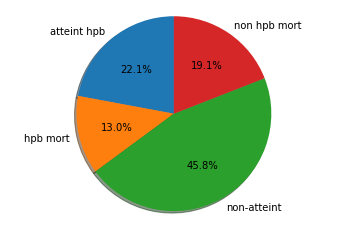

In [25]:
#petite représentation
labels = 'atteint hpb', 'hpb mort', 'non-atteint','non hpb mort'
sizes = [np.sum(hpb_vivant), np.sum(hpb_mort),np.sum(non_hpb_vivant),np.sum(non_hpb_mort)]

plt.pie(sizes, labels=labels,  autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.show()
#To Do  
#A commenter

<h2>Fumer est-il un indicateur de mort ? </h2>

In [26]:
fumeur_true = dataset["smoking"] ==1
fumeur_false = dataset["smoking"]  ==0
fumeur_mort = dataset['DEATH_EVENT'][fumeur_true] == 1
non_fumeur_mort = dataset['DEATH_EVENT'][fumeur_false] == 1
fumeur_vivant = dataset['DEATH_EVENT'][fumeur_true] == 0
non_fumeur_vivant = dataset['DEATH_EVENT'][fumeur_false] == 0

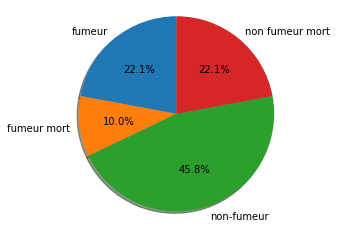

In [27]:
#petite représentation
labels = 'fumeur', 'fumeur mort', 'non-fumeur','non fumeur mort'
sizes = [np.sum(fumeur_vivant), np.sum(fumeur_mort),np.sum(non_fumeur_vivant),np.sum(non_fumeur_mort)]

plt.pie(sizes, labels=labels,  autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.show()

<h2>Etude de la plus grande corrélation: SERUM_CREATINE </h2>

le taux de créatinine:<br>
-0.7 à 1.4 mg/dl homme normalement<br>
-0.6 à 1.1 mg/dl pour la femme <br>


In [31]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,1


<h2>Homme cerum NORMAL vs HOMME cerum anormal</h2>

In [245]:
cerum_normal = dataset[(dataset["serum_creatinine"] >= 0.7) & (dataset["serum_creatinine"] <= 1.4)]["serum_creatinine"]
cerum_anormal =  dataset[(dataset["serum_creatinine"] < 0.7) | (dataset["serum_creatinine"] > 1.4)]["serum_creatinine"]

homme = dataset['sex']==1


cerum_anormal_homme = cerum_anormal[homme]
cerum_anormal_homme_vivant =  (dataset["DEATH_EVENT"] & cerum_anormal_homme) == 0
cerum_anormal_homme_mort =  (dataset["DEATH_EVENT"] & cerum_anormal_homme) == 1

cerum_normal_homme = cerum_normal[homme]
cerum_normal_homme_vivant = (dataset["DEATH_EVENT"] & cerum_normal_homme) == 0
cerum_normal_homme_mort =  (dataset["DEATH_EVENT"] & cerum_normal_homme) == 1
 

In [247]:
cerum_anormal[homme].shape,cerum_normal[homme].shape  # 194 Hommes

((51,), (143,))

In [248]:
np.sum(dataset["DEATH_EVENT"][homme])   # 62  homme morts au total

62

In [282]:
np.sum(cerum_anormal_homme_mort) + np.sum(cerum_normal_homme_mort)  #62 bien mort 

62

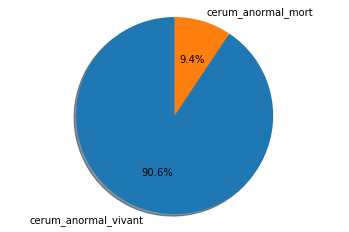

In [283]:
#petite représentation
labels = 'cerum_anormal_vivant', 'cerum_anormal_mort', 
sizes = [np.sum(cerum_anormal_homme_vivant), np.sum(cerum_anormal_homme_mort) ]

plt.pie(sizes, labels=labels,  autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.show()

In [284]:
(np.sum(cerum_anormal_homme_vivant), np.sum(cerum_anormal_homme_mort))  # 28 cerum anormal mort, 271 en vie

(271, 28)

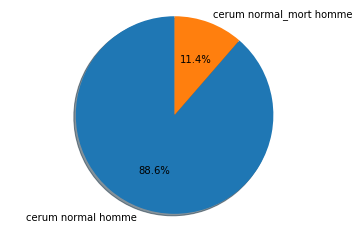

In [285]:
#petite représentation
labels = 'cerum normal homme', 'cerum normal_mort homme', 
sizes = [np.sum(cerum_normal_homme_vivant), np.sum(cerum_normal_homme_mort) ]

plt.pie(sizes, labels=labels,  autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.show()

In [286]:
(np.sum(cerum_normal_homme_vivant), np.sum(cerum_normal_homme_mort))  # 34 cerum normal mort , 265 en vie

(265, 34)

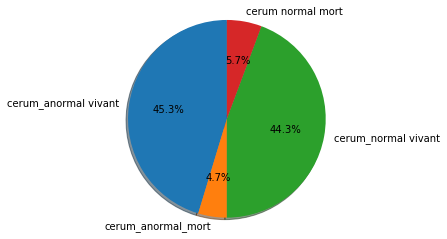

In [287]:
#petite représentation
labels = 'cerum_anormal vivant', 'cerum_anormal_mort', 'cerum_normal vivant','cerum normal mort'
sizes = [np.sum(cerum_anormal_homme_vivant), np.sum(cerum_anormal_homme_mort),np.sum(cerum_normal_homme_vivant),np.sum(cerum_normal_homme_mort)]

plt.pie(sizes, labels=labels,  autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.show()

<h2>Femme cerum NORMAL vs Femme cerum anormal</h2>

-0.6 à 1.1 mg/dl pour la femme

In [274]:
cerum_normal_2 = dataset[(dataset["serum_creatinine"] >= 0.6) & (dataset["serum_creatinine"] <= 1.1)]["serum_creatinine"]
cerum_anormal_2 =  dataset[(dataset["serum_creatinine"] < 0.6) | (dataset["serum_creatinine"] > 1.1)]["serum_creatinine"]

femme = dataset['sex']==0


cerum_anormal_femme = cerum_anormal_2[femme]
cerum_anormal_femme_vivant =  (dataset["DEATH_EVENT"] & cerum_anormal_femme) == 0
cerum_anormal_femme_mort =  (dataset["DEATH_EVENT"] & cerum_anormal_femme) == 1

cerum_normal_femme = cerum_normal_2[femme]
cerum_normal_femme_vivant = (dataset["DEATH_EVENT"] & cerum_normal_femme) == 0
cerum_normal_femme_mort =  (dataset["DEATH_EVENT"] & cerum_normal_femme) == 1
 

In [278]:
np.sum(dataset["DEATH_EVENT"][femme])   # 34  femmes mortes au total

34

In [280]:
np.sum(cerum_anormal_femme_mort) + np.sum(cerum_normal_femme_mort) # 34 femmes mortes

34

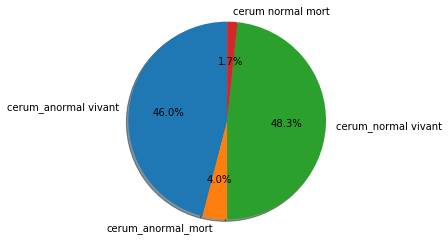

In [281]:
#petite représentation
labels = 'cerum_anormal vivant', 'cerum_anormal_mort', 'cerum_normal vivant','cerum normal mort'
sizes = [np.sum(cerum_anormal_femme_vivant), np.sum(cerum_anormal_femme_mort),np.sum(cerum_normal_femme_vivant),np.sum(cerum_normal_femme_mort)]

plt.pie(sizes, labels=labels,  autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.show()

<h2>Autre visualisation à faire </h2>

In [266]:
#idee
print("------Hommes qui fummes ------")
print("" ,dataset["smoking"][dataset["sex"] == 1].value_counts(normalize = True)[1]*100)

print("------Femmes qui fumme------")
print("" ,dataset["smoking"][dataset["sex"] == 0].value_counts(normalize = True)[1]*100)

------Hommes qui fummes ------
 47.42268041237113
------Femmes qui fumme------
 3.8095238095238098


<h2>Normalisation/Standardisation (standardisation) , faire la normalisation </h2>

In [267]:
#StandardScaler or MinMaxScaler 

In [268]:
#scaled_features = dataset.copy()
#col_names = ['age', 'creatinine_phosphokinase', 'ejection_fraction' ,'platelets' ,'serum_creatinine','serum_sodium','time']
#features = scaled_features[col_names]
#scaler = StandardScaler().fit(features.values)
#features = scaler.transform(features.values)
#scaled_features[col_names] = features
#scaled_features.head()


In [269]:
#dataset.head()

In [289]:
X = dataset.values[:, :-1]
y = dataset.values[:, -1]
#X ,y

In [290]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state =5)

In [291]:
x_train , y_train

(array([[ 7.72252644e-01, -8.71104775e-01, -5.32526741e-01, ...,
         -1.41976151e-01,  7.35688190e-01,  1.45416070e+00],
        [ 2.11961101e+00, -8.71104775e-01,  1.65728387e-04, ...,
         -5.95996141e-01, -1.35927151e+00, -6.87681906e-01],
        [-4.90895827e-01, -8.71104775e-01,  1.48158761e+00, ...,
          3.12043840e-01,  7.35688190e-01, -6.87681906e-01],
        ...,
        [ 3.51203153e-01,  1.14796753e+00, -4.84006302e-01, ...,
          7.66063830e-01, -1.35927151e+00, -6.87681906e-01],
        [-1.75404430e+00, -8.71104775e-01, -3.48768486e-01, ...,
          7.66063830e-01, -1.35927151e+00, -6.87681906e-01],
        [-1.75404430e+00,  1.14796753e+00, -4.96394499e-01, ...,
          9.93073825e-01, -1.35927151e+00, -6.87681906e-01]]),
 array([0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
 

In [273]:
#on fixe 
#loss = 'log'
#penalite =  l2'
#random_state pour la reproductibilité du résultat : on choissi 5 

model=  SGDClassifier(loss='log', penalty='l2', random_state=5)
model.fit(x_train,y_train)
print(model.score(x_train,y_train))  ## on pas d'overfitting sinon on aurait eu 100% 
                                

0.724907063197026


In [274]:
from sklearn.metrics import accuracy_score

<h2>  logistic regression vs linear svm (hors sujet) </h2>

In [284]:
##########
    ## SGDClassifier avec une fonction cout 'log' est equivalent à la fonction logistic regression
 ##source sklearn

model=  SGDClassifier(loss='log', penalty='l2', random_state=5)  
model.fit(x_train,y_train)
                                
predY = model.predict(x_test)
accuracy_score(y_test, predY)




0.7

In [285]:
    ## SGDClassifier avec une fonction cout 'hinge' est equivalent à la fonction SVM


model=  SGDClassifier(loss='hinge', penalty='l2' ,random_state=5)  ## fonction cout hinge ~~~   linear svm  ##source sklearn
model.fit(x_train,y_train)
                                
predY = model.predict(x_test)
accuracy_score(y_test, predY)




0.6

<h1> penalité  L2 comparer score avec fonction cout </h1>
#l2 empeche l'overfitting

<h2> Fonction coût / score </h2>

In [286]:
#recherche du meilleur random_state
score_model = []
loss_name =[]

loss_l = ['hinge','log', 'modified_huber', 'squared_hinge', 'perceptron','squared_loss', 'huber', 'epsilon_insensitive','squared_epsilon_insensitive']    
for i in loss_l:
    model_1 = SGDClassifier(loss=i, penalty='l2' , random_state=5)
    model_1.fit(x_train,y_train)
    scoreFinal =  model_1.score(x_train,y_train)
    print("loss :  " , i , " score = ",scoreFinal)
    loss_name.append(i)
    score_model.append(scoreFinal)
   

    

loss :   hinge  score =  0.7063197026022305
loss :   log  score =  0.724907063197026
loss :   modified_huber  score =  0.7286245353159851
loss :   squared_hinge  score =  0.6617100371747212
loss :   perceptron  score =  0.7100371747211895
loss :   squared_loss  score =  0.5390334572490706
loss :   huber  score =  0.6691449814126395
loss :   epsilon_insensitive  score =  0.49070631970260226
loss :   squared_epsilon_insensitive  score =  0.49814126394052044


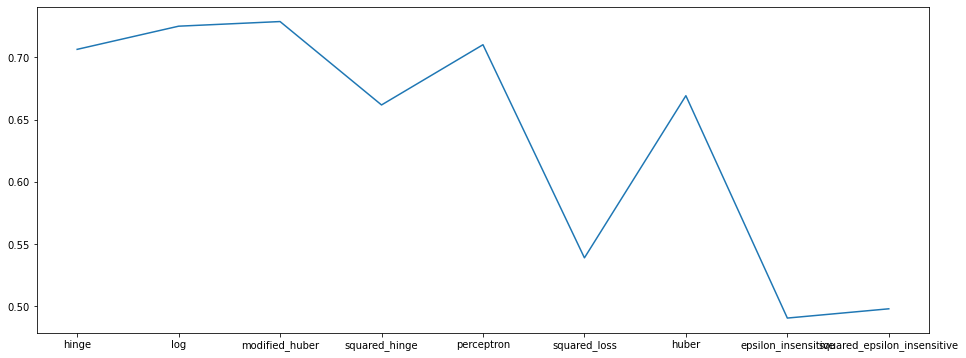

In [287]:
plt.figure(1, figsize=(16, 6))
plt.plot(loss_name,score_model)

In [288]:
scoreMaxi_index = score_model.index(max(score_model))
lossWithMaxScore = loss_name[scoreMaxi_index]
scoreMaxi = max(score_model)
print("score = ", scoreMaxi,  " Loss name = ", lossWithMaxScore)

score =  0.7286245353159851  Loss name =  modified_huber


In [289]:
## hinge est la fonction coût qui maximise notre score pour une penalité l2

<h2>Cross-validation(recherche des meilleurs hyper-paramètres) </h2>

In [290]:
monScoring = 'accuracy'  #metrique de score classification

In [291]:
loss = ['hinge','log', 'modified_huber', 'squared_hinge', 'perceptron','squared_loss', 'huber', 'epsilon_insensitive','squared_epsilon_insensitive']    
alpha_values = np.logspace(-4,-1,150)
#alpha_values = np.logspace(-7,1, num=15)
penal = ['l1','l2']

score_model = np.zeros((len(alpha_values),len(loss),len(penal)))

i=0
for alpha_v in alpha_values:
    j=0
    for loss_v in loss:
        k=0
        for pena_v in penal:
            model_cv=  SGDClassifier(penalty=pena_v, alpha=alpha_v , random_state=5 ,loss=loss_v , max_iter=5000)
            kfold = KFold(n_splits=5)
            cv_results = cross_val_score(model_cv, x_train, y_train, cv=kfold, scoring=monScoring)
            msg = "alpha = %f loss = %s penality = %s, accuracy: %f +/- (%f)" % (alpha_v,loss_v,pena_v, cv_results.mean(), cv_results.std())
            print(msg)
            score_model[i][j][k] = (cv_results.mean())*100
            alphaVal.append(alpha_v)
            k+=1
        j+=1
    i+=1

alpha = 0.000100 loss = hinge penality = l1, accuracy: 0.658001 +/- (0.029884)
alpha = 0.000100 loss = hinge penality = l2, accuracy: 0.732075 +/- (0.075785)
alpha = 0.000100 loss = log penality = l1, accuracy: 0.709713 +/- (0.052792)
alpha = 0.000100 loss = log penality = l2, accuracy: 0.624458 +/- (0.049385)
alpha = 0.000100 loss = modified_huber penality = l1, accuracy: 0.628232 +/- (0.090765)
alpha = 0.000100 loss = modified_huber penality = l2, accuracy: 0.683438 +/- (0.086751)
alpha = 0.000100 loss = squared_hinge penality = l1, accuracy: 0.631586 +/- (0.071186)
alpha = 0.000100 loss = squared_hinge penality = l2, accuracy: 0.654298 +/- (0.076302)
alpha = 0.000100 loss = perceptron penality = l1, accuracy: 0.661775 +/- (0.075954)
alpha = 0.000100 loss = perceptron penality = l2, accuracy: 0.679944 +/- (0.065694)
alpha = 0.000100 loss = squared_loss penality = l1, accuracy: 0.509364 +/- (0.120030)
alpha = 0.000100 loss = squared_loss penality = l2, accuracy: 0.435010 +/- (0.059667

alpha = 0.000126 loss = squared_loss penality = l1, accuracy: 0.471558 +/- (0.141493)
alpha = 0.000126 loss = squared_loss penality = l2, accuracy: 0.498043 +/- (0.079986)
alpha = 0.000126 loss = huber penality = l1, accuracy: 0.631936 +/- (0.062561)
alpha = 0.000126 loss = huber penality = l2, accuracy: 0.620475 +/- (0.063999)
alpha = 0.000126 loss = epsilon_insensitive penality = l1, accuracy: 0.583229 +/- (0.087387)
alpha = 0.000126 loss = epsilon_insensitive penality = l2, accuracy: 0.550035 +/- (0.095423)
alpha = 0.000126 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.468903 +/- (0.094898)
alpha = 0.000126 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.498323 +/- (0.114590)
alpha = 0.000132 loss = hinge penality = l1, accuracy: 0.680224 +/- (0.053310)
alpha = 0.000132 loss = hinge penality = l2, accuracy: 0.676660 +/- (0.102916)
alpha = 0.000132 loss = log penality = l1, accuracy: 0.658001 +/- (0.092600)
alpha = 0.000132 loss = log penality = l2, accu

alpha = 0.000167 loss = perceptron penality = l1, accuracy: 0.661705 +/- (0.047399)
alpha = 0.000167 loss = perceptron penality = l2, accuracy: 0.680084 +/- (0.053047)
alpha = 0.000167 loss = squared_loss penality = l1, accuracy: 0.490915 +/- (0.070412)
alpha = 0.000167 loss = squared_loss penality = l2, accuracy: 0.557582 +/- (0.153412)
alpha = 0.000167 loss = huber penality = l1, accuracy: 0.706150 +/- (0.070461)
alpha = 0.000167 loss = huber penality = l2, accuracy: 0.646611 +/- (0.080562)
alpha = 0.000167 loss = epsilon_insensitive penality = l1, accuracy: 0.572816 +/- (0.142652)
alpha = 0.000167 loss = epsilon_insensitive penality = l2, accuracy: 0.527743 +/- (0.079019)
alpha = 0.000167 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.620405 +/- (0.105697)
alpha = 0.000167 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.401887 +/- (0.073567)
alpha = 0.000174 loss = hinge penality = l1, accuracy: 0.728302 +/- (0.086248)
alpha = 0.000174 loss = hinge penal

alpha = 0.000220 loss = hinge penality = l2, accuracy: 0.720964 +/- (0.049780)
alpha = 0.000220 loss = log penality = l1, accuracy: 0.669113 +/- (0.088047)
alpha = 0.000220 loss = log penality = l2, accuracy: 0.676380 +/- (0.063762)
alpha = 0.000220 loss = modified_huber penality = l1, accuracy: 0.683857 +/- (0.077485)
alpha = 0.000220 loss = modified_huber penality = l2, accuracy: 0.676520 +/- (0.072056)
alpha = 0.000220 loss = squared_hinge penality = l1, accuracy: 0.624458 +/- (0.069072)
alpha = 0.000220 loss = squared_hinge penality = l2, accuracy: 0.672397 +/- (0.074609)
alpha = 0.000220 loss = perceptron penality = l1, accuracy: 0.646960 +/- (0.113795)
alpha = 0.000220 loss = perceptron penality = l2, accuracy: 0.699022 +/- (0.030646)
alpha = 0.000220 loss = squared_loss penality = l1, accuracy: 0.550314 +/- (0.115087)
alpha = 0.000220 loss = squared_loss penality = l2, accuracy: 0.520196 +/- (0.182676)
alpha = 0.000220 loss = huber penality = l1, accuracy: 0.702516 +/- (0.075325

alpha = 0.000290 loss = hinge penality = l1, accuracy: 0.669113 +/- (0.079015)
alpha = 0.000290 loss = hinge penality = l2, accuracy: 0.687631 +/- (0.059552)
alpha = 0.000290 loss = log penality = l1, accuracy: 0.658001 +/- (0.078139)
alpha = 0.000290 loss = log penality = l2, accuracy: 0.665409 +/- (0.054992)
alpha = 0.000290 loss = modified_huber penality = l1, accuracy: 0.687421 +/- (0.059866)
alpha = 0.000290 loss = modified_huber penality = l2, accuracy: 0.598463 +/- (0.059531)
alpha = 0.000290 loss = squared_hinge penality = l1, accuracy: 0.680014 +/- (0.049647)
alpha = 0.000290 loss = squared_hinge penality = l2, accuracy: 0.642488 +/- (0.113045)
alpha = 0.000290 loss = perceptron penality = l1, accuracy: 0.635570 +/- (0.044162)
alpha = 0.000290 loss = perceptron penality = l2, accuracy: 0.642977 +/- (0.058766)
alpha = 0.000290 loss = squared_loss penality = l1, accuracy: 0.442418 +/- (0.047679)
alpha = 0.000290 loss = squared_loss penality = l2, accuracy: 0.516702 +/- (0.111786

alpha = 0.000366 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.527813 +/- (0.033107)
alpha = 0.000366 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.572537 +/- (0.091215)
alpha = 0.000384 loss = hinge penality = l1, accuracy: 0.695038 +/- (0.063278)
alpha = 0.000384 loss = hinge penality = l2, accuracy: 0.646751 +/- (0.041300)
alpha = 0.000384 loss = log penality = l1, accuracy: 0.676450 +/- (0.073353)
alpha = 0.000384 loss = log penality = l2, accuracy: 0.687631 +/- (0.046634)
alpha = 0.000384 loss = modified_huber penality = l1, accuracy: 0.650384 +/- (0.072516)
alpha = 0.000384 loss = modified_huber penality = l2, accuracy: 0.706150 +/- (0.077860)
alpha = 0.000384 loss = squared_hinge penality = l1, accuracy: 0.639343 +/- (0.072088)
alpha = 0.000384 loss = squared_hinge penality = l2, accuracy: 0.694759 +/- (0.063065)
alpha = 0.000384 loss = perceptron penality = l1, accuracy: 0.669182 +/- (0.068478)
alpha = 0.000384 loss = perceptron penality = l2, ac

alpha = 0.000484 loss = epsilon_insensitive penality = l2, accuracy: 0.650105 +/- (0.070675)
alpha = 0.000484 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.494689 +/- (0.126498)
alpha = 0.000484 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.524109 +/- (0.054800)
alpha = 0.000507 loss = hinge penality = l1, accuracy: 0.683997 +/- (0.033212)
alpha = 0.000507 loss = hinge penality = l2, accuracy: 0.694969 +/- (0.036258)
alpha = 0.000507 loss = log penality = l1, accuracy: 0.702376 +/- (0.044021)
alpha = 0.000507 loss = log penality = l2, accuracy: 0.657932 +/- (0.030691)
alpha = 0.000507 loss = modified_huber penality = l1, accuracy: 0.654158 +/- (0.055166)
alpha = 0.000507 loss = modified_huber penality = l2, accuracy: 0.654018 +/- (0.086923)
alpha = 0.000507 loss = squared_hinge penality = l1, accuracy: 0.732145 +/- (0.046074)
alpha = 0.000507 loss = squared_hinge penality = l2, accuracy: 0.646681 +/- (0.059554)
alpha = 0.000507 loss = perceptron penality

alpha = 0.000639 loss = squared_loss penality = l1, accuracy: 0.595108 +/- (0.102038)
alpha = 0.000639 loss = squared_loss penality = l2, accuracy: 0.516003 +/- (0.111097)
alpha = 0.000639 loss = huber penality = l1, accuracy: 0.687701 +/- (0.032086)
alpha = 0.000639 loss = huber penality = l2, accuracy: 0.706150 +/- (0.062188)
alpha = 0.000639 loss = epsilon_insensitive penality = l1, accuracy: 0.680294 +/- (0.051556)
alpha = 0.000639 loss = epsilon_insensitive penality = l2, accuracy: 0.609294 +/- (0.101801)
alpha = 0.000639 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.542488 +/- (0.116244)
alpha = 0.000639 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.531726 +/- (0.075469)
alpha = 0.000669 loss = hinge penality = l1, accuracy: 0.702446 +/- (0.063856)
alpha = 0.000669 loss = hinge penality = l2, accuracy: 0.706080 +/- (0.050510)
alpha = 0.000669 loss = log penality = l1, accuracy: 0.717261 +/- (0.051583)
alpha = 0.000669 loss = log penality = l2, accu

alpha = 0.000844 loss = log penality = l2, accuracy: 0.698812 +/- (0.022522)
alpha = 0.000844 loss = modified_huber penality = l1, accuracy: 0.643187 +/- (0.045419)
alpha = 0.000844 loss = modified_huber penality = l2, accuracy: 0.661565 +/- (0.058720)
alpha = 0.000844 loss = squared_hinge penality = l1, accuracy: 0.646611 +/- (0.065540)
alpha = 0.000844 loss = squared_hinge penality = l2, accuracy: 0.583718 +/- (0.108049)
alpha = 0.000844 loss = perceptron penality = l1, accuracy: 0.568763 +/- (0.047414)
alpha = 0.000844 loss = perceptron penality = l2, accuracy: 0.646541 +/- (0.058339)
alpha = 0.000844 loss = squared_loss penality = l1, accuracy: 0.669392 +/- (0.127992)
alpha = 0.000844 loss = squared_loss penality = l2, accuracy: 0.550245 +/- (0.065163)
alpha = 0.000844 loss = huber penality = l1, accuracy: 0.695178 +/- (0.044623)
alpha = 0.000844 loss = huber penality = l2, accuracy: 0.717470 +/- (0.058999)
alpha = 0.000844 loss = epsilon_insensitive penality = l1, accuracy: 0.6321

alpha = 0.001114 loss = modified_huber penality = l1, accuracy: 0.654228 +/- (0.062848)
alpha = 0.001114 loss = modified_huber penality = l2, accuracy: 0.624458 +/- (0.080958)
alpha = 0.001114 loss = squared_hinge penality = l1, accuracy: 0.635639 +/- (0.092079)
alpha = 0.001114 loss = squared_hinge penality = l2, accuracy: 0.620894 +/- (0.047067)
alpha = 0.001114 loss = perceptron penality = l1, accuracy: 0.624389 +/- (0.064381)
alpha = 0.001114 loss = perceptron penality = l2, accuracy: 0.672816 +/- (0.074795)
alpha = 0.001114 loss = squared_loss penality = l1, accuracy: 0.665479 +/- (0.123795)
alpha = 0.001114 loss = squared_loss penality = l2, accuracy: 0.650384 +/- (0.086332)
alpha = 0.001114 loss = huber penality = l1, accuracy: 0.672816 +/- (0.036631)
alpha = 0.001114 loss = huber penality = l2, accuracy: 0.706359 +/- (0.067490)
alpha = 0.001114 loss = epsilon_insensitive penality = l1, accuracy: 0.661705 +/- (0.084764)
alpha = 0.001114 loss = epsilon_insensitive penality = l2, 

alpha = 0.001405 loss = huber penality = l2, accuracy: 0.687701 +/- (0.044607)
alpha = 0.001405 loss = epsilon_insensitive penality = l1, accuracy: 0.617121 +/- (0.065662)
alpha = 0.001405 loss = epsilon_insensitive penality = l2, accuracy: 0.709783 +/- (0.071117)
alpha = 0.001405 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.680363 +/- (0.094480)
alpha = 0.001405 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.531447 +/- (0.054207)
alpha = 0.001472 loss = hinge penality = l1, accuracy: 0.691405 +/- (0.047962)
alpha = 0.001472 loss = hinge penality = l2, accuracy: 0.706289 +/- (0.014329)
alpha = 0.001472 loss = log penality = l1, accuracy: 0.724668 +/- (0.062562)
alpha = 0.001472 loss = log penality = l2, accuracy: 0.732145 +/- (0.044560)
alpha = 0.001472 loss = modified_huber penality = l1, accuracy: 0.639273 +/- (0.056531)
alpha = 0.001472 loss = modified_huber penality = l2, accuracy: 0.624389 +/- (0.068510)
alpha = 0.001472 loss = squared_hinge penalit

alpha = 0.001855 loss = modified_huber penality = l1, accuracy: 0.658001 +/- (0.083239)
alpha = 0.001855 loss = modified_huber penality = l2, accuracy: 0.676380 +/- (0.071854)
alpha = 0.001855 loss = squared_hinge penality = l1, accuracy: 0.609574 +/- (0.069767)
alpha = 0.001855 loss = squared_hinge penality = l2, accuracy: 0.624389 +/- (0.084633)
alpha = 0.001855 loss = perceptron penality = l1, accuracy: 0.654088 +/- (0.049154)
alpha = 0.001855 loss = perceptron penality = l2, accuracy: 0.713487 +/- (0.050974)
alpha = 0.001855 loss = squared_loss penality = l1, accuracy: 0.676310 +/- (0.062073)
alpha = 0.001855 loss = squared_loss penality = l2, accuracy: 0.657862 +/- (0.071493)
alpha = 0.001855 loss = huber penality = l1, accuracy: 0.695108 +/- (0.045109)
alpha = 0.001855 loss = huber penality = l2, accuracy: 0.698812 +/- (0.067989)
alpha = 0.001855 loss = epsilon_insensitive penality = l1, accuracy: 0.654437 +/- (0.133976)
alpha = 0.001855 loss = epsilon_insensitive penality = l2, 

alpha = 0.002340 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.635570 +/- (0.118991)
alpha = 0.002451 loss = hinge penality = l1, accuracy: 0.713557 +/- (0.073637)
alpha = 0.002451 loss = hinge penality = l2, accuracy: 0.728512 +/- (0.028830)
alpha = 0.002451 loss = log penality = l1, accuracy: 0.728372 +/- (0.076624)
alpha = 0.002451 loss = log penality = l2, accuracy: 0.732075 +/- (0.057220)
alpha = 0.002451 loss = modified_huber penality = l1, accuracy: 0.657932 +/- (0.089861)
alpha = 0.002451 loss = modified_huber penality = l2, accuracy: 0.676310 +/- (0.066346)
alpha = 0.002451 loss = squared_hinge penality = l1, accuracy: 0.746960 +/- (0.057056)
alpha = 0.002451 loss = squared_hinge penality = l2, accuracy: 0.654368 +/- (0.012439)
alpha = 0.002451 loss = perceptron penality = l1, accuracy: 0.616771 +/- (0.047955)
alpha = 0.002451 loss = perceptron penality = l2, accuracy: 0.691405 +/- (0.019491)
alpha = 0.002451 loss = squared_loss penality = l1, accuracy: 0.66890

alpha = 0.003090 loss = squared_loss penality = l2, accuracy: 0.676380 +/- (0.065878)
alpha = 0.003090 loss = huber penality = l1, accuracy: 0.680154 +/- (0.042385)
alpha = 0.003090 loss = huber penality = l2, accuracy: 0.713697 +/- (0.055946)
alpha = 0.003090 loss = epsilon_insensitive penality = l1, accuracy: 0.691335 +/- (0.044013)
alpha = 0.003090 loss = epsilon_insensitive penality = l2, accuracy: 0.643187 +/- (0.031073)
alpha = 0.003090 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.724738 +/- (0.031311)
alpha = 0.003090 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.565059 +/- (0.111420)
alpha = 0.003236 loss = hinge penality = l1, accuracy: 0.746960 +/- (0.052026)
alpha = 0.003236 loss = hinge penality = l2, accuracy: 0.728512 +/- (0.056242)
alpha = 0.003236 loss = log penality = l1, accuracy: 0.735849 +/- (0.069625)
alpha = 0.003236 loss = log penality = l2, accuracy: 0.728372 +/- (0.061754)
alpha = 0.003236 loss = modified_huber penality = l1, ac

alpha = 0.003896 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.624249 +/- (0.131574)
alpha = 0.004081 loss = hinge penality = l1, accuracy: 0.728372 +/- (0.083478)
alpha = 0.004081 loss = hinge penality = l2, accuracy: 0.758141 +/- (0.068235)
alpha = 0.004081 loss = log penality = l1, accuracy: 0.724668 +/- (0.077276)
alpha = 0.004081 loss = log penality = l2, accuracy: 0.732075 +/- (0.064010)
alpha = 0.004081 loss = modified_huber penality = l1, accuracy: 0.620894 +/- (0.063234)
alpha = 0.004081 loss = modified_huber penality = l2, accuracy: 0.709853 +/- (0.051668)
alpha = 0.004081 loss = squared_hinge penality = l1, accuracy: 0.691405 +/- (0.060598)
alpha = 0.004081 loss = squared_hinge penality = l2, accuracy: 0.680154 +/- (0.102169)
alpha = 0.004081 loss = perceptron penality = l1, accuracy: 0.650454 +/- (0.040419)
alpha = 0.004081 loss = perceptron penality = l2, accuracy: 0.717191 +/- (0.054702)
alpha = 0.004081 loss = squared_loss penality = l1, accuracy: 0.69105

alpha = 0.005145 loss = epsilon_insensitive penality = l2, accuracy: 0.702376 +/- (0.040786)
alpha = 0.005145 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.661426 +/- (0.056226)
alpha = 0.005145 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.646541 +/- (0.101302)
alpha = 0.005389 loss = hinge penality = l1, accuracy: 0.728512 +/- (0.067341)
alpha = 0.005389 loss = hinge penality = l2, accuracy: 0.739623 +/- (0.071856)
alpha = 0.005389 loss = log penality = l1, accuracy: 0.732075 +/- (0.077574)
alpha = 0.005389 loss = log penality = l2, accuracy: 0.732075 +/- (0.072074)
alpha = 0.005389 loss = modified_huber penality = l1, accuracy: 0.698672 +/- (0.041334)
alpha = 0.005389 loss = modified_huber penality = l2, accuracy: 0.669043 +/- (0.046675)
alpha = 0.005389 loss = squared_hinge penality = l1, accuracy: 0.724738 +/- (0.029038)
alpha = 0.005389 loss = squared_hinge penality = l2, accuracy: 0.702516 +/- (0.072541)
alpha = 0.005389 loss = perceptron penality

alpha = 0.006795 loss = squared_loss penality = l2, accuracy: 0.735709 +/- (0.056379)
alpha = 0.006795 loss = huber penality = l1, accuracy: 0.665339 +/- (0.024595)
alpha = 0.006795 loss = huber penality = l2, accuracy: 0.691405 +/- (0.045011)
alpha = 0.006795 loss = epsilon_insensitive penality = l1, accuracy: 0.706289 +/- (0.094060)
alpha = 0.006795 loss = epsilon_insensitive penality = l2, accuracy: 0.720894 +/- (0.066754)
alpha = 0.006795 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.639483 +/- (0.062163)
alpha = 0.006795 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.665129 +/- (0.064925)
alpha = 0.007118 loss = hinge penality = l1, accuracy: 0.732215 +/- (0.067403)
alpha = 0.007118 loss = hinge penality = l2, accuracy: 0.735919 +/- (0.060835)
alpha = 0.007118 loss = log penality = l1, accuracy: 0.732145 +/- (0.078108)
alpha = 0.007118 loss = log penality = l2, accuracy: 0.739483 +/- (0.068698)
alpha = 0.007118 loss = modified_huber penality = l1, ac

alpha = 0.008975 loss = epsilon_insensitive penality = l2, accuracy: 0.709923 +/- (0.082060)
alpha = 0.008975 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.672607 +/- (0.035156)
alpha = 0.008975 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.720964 +/- (0.052463)
alpha = 0.009401 loss = hinge penality = l1, accuracy: 0.746960 +/- (0.070011)
alpha = 0.009401 loss = hinge penality = l2, accuracy: 0.739623 +/- (0.065880)
alpha = 0.009401 loss = log penality = l1, accuracy: 0.724738 +/- (0.078695)
alpha = 0.009401 loss = log penality = l2, accuracy: 0.732075 +/- (0.073019)
alpha = 0.009401 loss = modified_huber penality = l1, accuracy: 0.732075 +/- (0.066118)
alpha = 0.009401 loss = modified_huber penality = l2, accuracy: 0.698812 +/- (0.022522)
alpha = 0.009401 loss = squared_hinge penality = l1, accuracy: 0.687701 +/- (0.018538)
alpha = 0.009401 loss = squared_hinge penality = l2, accuracy: 0.687491 +/- (0.038248)
alpha = 0.009401 loss = perceptron penality

alpha = 0.012415 loss = hinge penality = l1, accuracy: 0.739623 +/- (0.075578)
alpha = 0.012415 loss = hinge penality = l2, accuracy: 0.732145 +/- (0.063586)
alpha = 0.012415 loss = log penality = l1, accuracy: 0.728442 +/- (0.078925)
alpha = 0.012415 loss = log penality = l2, accuracy: 0.728372 +/- (0.076624)
alpha = 0.012415 loss = modified_huber penality = l1, accuracy: 0.732215 +/- (0.058700)
alpha = 0.012415 loss = modified_huber penality = l2, accuracy: 0.717191 +/- (0.045078)
alpha = 0.012415 loss = squared_hinge penality = l1, accuracy: 0.709853 +/- (0.031992)
alpha = 0.012415 loss = squared_hinge penality = l2, accuracy: 0.717331 +/- (0.035173)
alpha = 0.012415 loss = perceptron penality = l1, accuracy: 0.609713 +/- (0.113963)
alpha = 0.012415 loss = perceptron penality = l2, accuracy: 0.650594 +/- (0.039152)
alpha = 0.012415 loss = squared_loss penality = l1, accuracy: 0.747030 +/- (0.062373)
alpha = 0.012415 loss = squared_loss penality = l2, accuracy: 0.732145 +/- (0.070735

alpha = 0.016397 loss = log penality = l1, accuracy: 0.728512 +/- (0.071299)
alpha = 0.016397 loss = log penality = l2, accuracy: 0.739553 +/- (0.066257)
alpha = 0.016397 loss = modified_huber penality = l1, accuracy: 0.728442 +/- (0.067699)
alpha = 0.016397 loss = modified_huber penality = l2, accuracy: 0.724668 +/- (0.043086)
alpha = 0.016397 loss = squared_hinge penality = l1, accuracy: 0.735849 +/- (0.047343)
alpha = 0.016397 loss = squared_hinge penality = l2, accuracy: 0.728442 +/- (0.035930)
alpha = 0.016397 loss = perceptron penality = l1, accuracy: 0.635849 +/- (0.087495)
alpha = 0.016397 loss = perceptron penality = l2, accuracy: 0.650384 +/- (0.058951)
alpha = 0.016397 loss = squared_loss penality = l1, accuracy: 0.746960 +/- (0.097099)
alpha = 0.016397 loss = squared_loss penality = l2, accuracy: 0.743326 +/- (0.068394)
alpha = 0.016397 loss = huber penality = l1, accuracy: 0.661705 +/- (0.024507)
alpha = 0.016397 loss = huber penality = l2, accuracy: 0.687701 +/- (0.037961

alpha = 0.021656 loss = log penality = l2, accuracy: 0.739553 +/- (0.066257)
alpha = 0.021656 loss = modified_huber penality = l1, accuracy: 0.728442 +/- (0.075369)
alpha = 0.021656 loss = modified_huber penality = l2, accuracy: 0.732145 +/- (0.039675)
alpha = 0.021656 loss = squared_hinge penality = l1, accuracy: 0.743187 +/- (0.054775)
alpha = 0.021656 loss = squared_hinge penality = l2, accuracy: 0.728372 +/- (0.052117)
alpha = 0.021656 loss = perceptron penality = l1, accuracy: 0.694899 +/- (0.046871)
alpha = 0.021656 loss = perceptron penality = l2, accuracy: 0.598393 +/- (0.042686)
alpha = 0.021656 loss = squared_loss penality = l1, accuracy: 0.743117 +/- (0.069602)
alpha = 0.021656 loss = squared_loss penality = l2, accuracy: 0.739483 +/- (0.076268)
alpha = 0.021656 loss = huber penality = l1, accuracy: 0.665479 +/- (0.025446)
alpha = 0.021656 loss = huber penality = l2, accuracy: 0.683997 +/- (0.031078)
alpha = 0.021656 loss = epsilon_insensitive penality = l1, accuracy: 0.6763

alpha = 0.028601 loss = squared_hinge penality = l2, accuracy: 0.724598 +/- (0.071201)
alpha = 0.028601 loss = perceptron penality = l1, accuracy: 0.616911 +/- (0.094220)
alpha = 0.028601 loss = perceptron penality = l2, accuracy: 0.680224 +/- (0.054581)
alpha = 0.028601 loss = squared_loss penality = l1, accuracy: 0.687701 +/- (0.065740)
alpha = 0.028601 loss = squared_loss penality = l2, accuracy: 0.739483 +/- (0.076268)
alpha = 0.028601 loss = huber penality = l1, accuracy: 0.665479 +/- (0.025446)
alpha = 0.028601 loss = huber penality = l2, accuracy: 0.676450 +/- (0.035573)
alpha = 0.028601 loss = epsilon_insensitive penality = l1, accuracy: 0.687631 +/- (0.040324)
alpha = 0.028601 loss = epsilon_insensitive penality = l2, accuracy: 0.691405 +/- (0.055887)
alpha = 0.028601 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.720894 +/- (0.108920)
alpha = 0.028601 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.735779 +/- (0.071948)
alpha = 0.029958 loss = hin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.031379 loss = huber penality = l2, accuracy: 0.676450 +/- (0.035573)
alpha = 0.031379 loss = epsilon_insensitive penality = l1, accuracy: 0.691335 +/- (0.047026)
alpha = 0.031379 loss = epsilon_insensitive penality = l2, accuracy: 0.695108 +/- (0.061790)
alpha = 0.031379 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.721034 +/- (0.032463)
alpha = 0.031379 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.735779 +/- (0.074753)
alpha = 0.032868 loss = hinge penality = l1, accuracy: 0.724738 +/- (0.069435)
alpha = 0.032868 loss = hinge penality = l2, accuracy: 0.747030 +/- (0.071589)
alpha = 0.032868 loss = log penality = l1, accuracy: 0.724808 +/- (0.064998)
alpha = 0.032868 loss = log penality = l2, accuracy: 0.743256 +/- (0.078101)
alpha = 0.032868 loss = modified_huber penality = l1, accuracy: 0.739623 +/- (0.084165)
alpha = 0.032868 loss = modified_huber penality = l2, accuracy: 0.728372 +/- (0.079263)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.032868 loss = squared_hinge penality = l1, accuracy: 0.743117 +/- (0.081410)
alpha = 0.032868 loss = squared_hinge penality = l2, accuracy: 0.717191 +/- (0.075735)
alpha = 0.032868 loss = perceptron penality = l1, accuracy: 0.680224 +/- (0.028006)
alpha = 0.032868 loss = perceptron penality = l2, accuracy: 0.665549 +/- (0.029705)
alpha = 0.032868 loss = squared_loss penality = l1, accuracy: 0.732215 +/- (0.048460)
alpha = 0.032868 loss = squared_loss penality = l2, accuracy: 0.743256 +/- (0.072641)
alpha = 0.032868 loss = huber penality = l1, accuracy: 0.665479 +/- (0.025446)
alpha = 0.032868 loss = huber penality = l2, accuracy: 0.676450 +/- (0.035573)
alpha = 0.032868 loss = epsilon_insensitive penality = l1, accuracy: 0.687631 +/- (0.040324)
alpha = 0.032868 loss = epsilon_insensitive penality = l2, accuracy: 0.691405 +/- (0.055887)
alpha = 0.032868 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.724738 +/- (0.087760)
alpha = 0.032868 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.034428 loss = squared_hinge penality = l1, accuracy: 0.746890 +/- (0.079557)
alpha = 0.034428 loss = squared_hinge penality = l2, accuracy: 0.720894 +/- (0.081553)
alpha = 0.034428 loss = perceptron penality = l1, accuracy: 0.635779 +/- (0.108679)
alpha = 0.034428 loss = perceptron penality = l2, accuracy: 0.698672 +/- (0.096903)
alpha = 0.034428 loss = squared_loss penality = l1, accuracy: 0.728512 +/- (0.052456)
alpha = 0.034428 loss = squared_loss penality = l2, accuracy: 0.735779 +/- (0.074753)
alpha = 0.034428 loss = huber penality = l1, accuracy: 0.665479 +/- (0.025446)
alpha = 0.034428 loss = huber penality = l2, accuracy: 0.676450 +/- (0.035573)
alpha = 0.034428 loss = epsilon_insensitive penality = l1, accuracy: 0.683927 +/- (0.039520)
alpha = 0.034428 loss = epsilon_insensitive penality = l2, accuracy: 0.698812 +/- (0.067989)
alpha = 0.034428 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.750664 +/- (0.097848)
alpha = 0.034428 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.036062 loss = squared_hinge penality = l1, accuracy: 0.750594 +/- (0.074267)
alpha = 0.036062 loss = squared_hinge penality = l2, accuracy: 0.720825 +/- (0.075852)
alpha = 0.036062 loss = perceptron penality = l1, accuracy: 0.531866 +/- (0.106573)
alpha = 0.036062 loss = perceptron penality = l2, accuracy: 0.687352 +/- (0.061561)
alpha = 0.036062 loss = squared_loss penality = l1, accuracy: 0.724808 +/- (0.046553)
alpha = 0.036062 loss = squared_loss penality = l2, accuracy: 0.739483 +/- (0.076268)
alpha = 0.036062 loss = huber penality = l1, accuracy: 0.665479 +/- (0.025446)
alpha = 0.036062 loss = huber penality = l2, accuracy: 0.676450 +/- (0.035573)
alpha = 0.036062 loss = epsilon_insensitive penality = l1, accuracy: 0.683927 +/- (0.039520)
alpha = 0.036062 loss = epsilon_insensitive penality = l2, accuracy: 0.691405 +/- (0.055887)
alpha = 0.036062 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.750664 +/- (0.077509)
alpha = 0.036062 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.037773 loss = huber penality = l1, accuracy: 0.665479 +/- (0.025446)
alpha = 0.037773 loss = huber penality = l2, accuracy: 0.676450 +/- (0.035573)
alpha = 0.037773 loss = epsilon_insensitive penality = l1, accuracy: 0.683927 +/- (0.050220)
alpha = 0.037773 loss = epsilon_insensitive penality = l2, accuracy: 0.695108 +/- (0.061790)
alpha = 0.037773 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.724738 +/- (0.073280)
alpha = 0.037773 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.739483 +/- (0.076268)
alpha = 0.039565 loss = hinge penality = l1, accuracy: 0.713627 +/- (0.061032)
alpha = 0.039565 loss = hinge penality = l2, accuracy: 0.743326 +/- (0.063181)
alpha = 0.039565 loss = log penality = l1, accuracy: 0.743396 +/- (0.050744)
alpha = 0.039565 loss = log penality = l2, accuracy: 0.735779 +/- (0.079208)
alpha = 0.039565 loss = modified_huber penality = l1, accuracy: 0.735849 +/- (0.090221)
alpha = 0.039565 loss = modified_huber penality = l2, 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.039565 loss = squared_hinge penality = l1, accuracy: 0.750594 +/- (0.074267)
alpha = 0.039565 loss = squared_hinge penality = l2, accuracy: 0.720825 +/- (0.079387)
alpha = 0.039565 loss = perceptron penality = l1, accuracy: 0.669182 +/- (0.020901)
alpha = 0.039565 loss = perceptron penality = l2, accuracy: 0.657722 +/- (0.134135)
alpha = 0.039565 loss = squared_loss penality = l1, accuracy: 0.717470 +/- (0.042834)
alpha = 0.039565 loss = squared_loss penality = l2, accuracy: 0.739483 +/- (0.076268)
alpha = 0.039565 loss = huber penality = l1, accuracy: 0.665479 +/- (0.025446)
alpha = 0.039565 loss = huber penality = l2, accuracy: 0.676450 +/- (0.035573)
alpha = 0.039565 loss = epsilon_insensitive penality = l1, accuracy: 0.680154 +/- (0.042385)
alpha = 0.039565 loss = epsilon_insensitive penality = l2, accuracy: 0.695108 +/- (0.061790)
alpha = 0.039565 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.709923 +/- (0.043964)
alpha = 0.039565 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "



alpha = 0.041443 loss = perceptron penality = l1, accuracy: 0.575262 +/- (0.142749)
alpha = 0.041443 loss = perceptron penality = l2, accuracy: 0.661495 +/- (0.044709)
alpha = 0.041443 loss = squared_loss penality = l1, accuracy: 0.732285 +/- (0.079264)
alpha = 0.041443 loss = squared_loss penality = l2, accuracy: 0.739483 +/- (0.076268)
alpha = 0.041443 loss = huber penality = l1, accuracy: 0.665479 +/- (0.025446)
alpha = 0.041443 loss = huber penality = l2, accuracy: 0.676450 +/- (0.035573)
alpha = 0.041443 loss = epsilon_insensitive penality = l1, accuracy: 0.683927 +/- (0.039520)
alpha = 0.041443 loss = epsilon_insensitive penality = l2, accuracy: 0.691405 +/- (0.055887)
alpha = 0.041443 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.721034 +/- (0.085813)
alpha = 0.041443 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.735779 +/- (0.078337)
alpha = 0.043409 loss = hinge penality = l1, accuracy: 0.702516 +/- (0.048802)
alpha = 0.043409 loss = hinge pena

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.043409 loss = squared_hinge penality = l1, accuracy: 0.754298 +/- (0.073214)
alpha = 0.043409 loss = squared_hinge penality = l2, accuracy: 0.724528 +/- (0.077175)
alpha = 0.043409 loss = perceptron penality = l1, accuracy: 0.597484 +/- (0.151157)
alpha = 0.043409 loss = perceptron penality = l2, accuracy: 0.665339 +/- (0.059039)
alpha = 0.043409 loss = squared_loss penality = l1, accuracy: 0.717470 +/- (0.080614)
alpha = 0.043409 loss = squared_loss penality = l2, accuracy: 0.739483 +/- (0.076268)
alpha = 0.043409 loss = huber penality = l1, accuracy: 0.665479 +/- (0.025446)
alpha = 0.043409 loss = huber penality = l2, accuracy: 0.672746 +/- (0.037320)
alpha = 0.043409 loss = epsilon_insensitive penality = l1, accuracy: 0.680154 +/- (0.042385)
alpha = 0.043409 loss = epsilon_insensitive penality = l2, accuracy: 0.695108 +/- (0.061790)
alpha = 0.043409 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.732215 +/- (0.031251)
alpha = 0.043409 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.045469 loss = squared_hinge penality = l2, accuracy: 0.724528 +/- (0.077175)
alpha = 0.045469 loss = perceptron penality = l1, accuracy: 0.657862 +/- (0.056487)
alpha = 0.045469 loss = perceptron penality = l2, accuracy: 0.687421 +/- (0.079545)
alpha = 0.045469 loss = squared_loss penality = l1, accuracy: 0.702446 +/- (0.049310)
alpha = 0.045469 loss = squared_loss penality = l2, accuracy: 0.739483 +/- (0.076268)
alpha = 0.045469 loss = huber penality = l1, accuracy: 0.665479 +/- (0.025446)
alpha = 0.045469 loss = huber penality = l2, accuracy: 0.672746 +/- (0.037320)
alpha = 0.045469 loss = epsilon_insensitive penality = l1, accuracy: 0.676450 +/- (0.035573)
alpha = 0.045469 loss = epsilon_insensitive penality = l2, accuracy: 0.691405 +/- (0.055887)
alpha = 0.045469 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.747030 +/- (0.065589)
alpha = 0.045469 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.735779 +/- (0.078337)
alpha = 0.047627 loss = hin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.047627 loss = squared_hinge penality = l1, accuracy: 0.754298 +/- (0.076870)
alpha = 0.047627 loss = squared_hinge penality = l2, accuracy: 0.720894 +/- (0.067774)
alpha = 0.047627 loss = perceptron penality = l1, accuracy: 0.605311 +/- (0.110808)
alpha = 0.047627 loss = perceptron penality = l2, accuracy: 0.691125 +/- (0.062423)
alpha = 0.047627 loss = squared_loss penality = l1, accuracy: 0.698812 +/- (0.068990)
alpha = 0.047627 loss = squared_loss penality = l2, accuracy: 0.739483 +/- (0.076268)
alpha = 0.047627 loss = huber penality = l1, accuracy: 0.665479 +/- (0.025446)
alpha = 0.047627 loss = huber penality = l2, accuracy: 0.672746 +/- (0.037320)
alpha = 0.047627 loss = epsilon_insensitive penality = l1, accuracy: 0.680154 +/- (0.042385)
alpha = 0.047627 loss = epsilon_insensitive penality = l2, accuracy: 0.695108 +/- (0.050828)
alpha = 0.047627 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.724598 +/- (0.077652)
alpha = 0.047627 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.049887 loss = squared_hinge penality = l1, accuracy: 0.746890 +/- (0.068434)
alpha = 0.049887 loss = squared_hinge penality = l2, accuracy: 0.724598 +/- (0.066209)
alpha = 0.049887 loss = perceptron penality = l1, accuracy: 0.624738 +/- (0.168677)
alpha = 0.049887 loss = perceptron penality = l2, accuracy: 0.698602 +/- (0.057247)
alpha = 0.049887 loss = squared_loss penality = l1, accuracy: 0.702516 +/- (0.052850)
alpha = 0.049887 loss = squared_loss penality = l2, accuracy: 0.739483 +/- (0.076268)
alpha = 0.049887 loss = huber penality = l1, accuracy: 0.665479 +/- (0.025446)
alpha = 0.049887 loss = huber penality = l2, accuracy: 0.672746 +/- (0.037320)
alpha = 0.049887 loss = epsilon_insensitive penality = l1, accuracy: 0.676450 +/- (0.035573)
alpha = 0.049887 loss = epsilon_insensitive penality = l2, accuracy: 0.687701 +/- (0.054314)
alpha = 0.049887 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.750804 +/- (0.063164)
alpha = 0.049887 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.052254 loss = squared_hinge penality = l1, accuracy: 0.746890 +/- (0.064300)
alpha = 0.052254 loss = squared_hinge penality = l2, accuracy: 0.720894 +/- (0.068779)
alpha = 0.052254 loss = perceptron penality = l1, accuracy: 0.449336 +/- (0.132058)
alpha = 0.052254 loss = perceptron penality = l2, accuracy: 0.646890 +/- (0.030331)
alpha = 0.052254 loss = squared_loss penality = l1, accuracy: 0.695108 +/- (0.032781)
alpha = 0.052254 loss = squared_loss penality = l2, accuracy: 0.739483 +/- (0.076268)
alpha = 0.052254 loss = huber penality = l1, accuracy: 0.665479 +/- (0.025446)
alpha = 0.052254 loss = huber penality = l2, accuracy: 0.672746 +/- (0.037320)
alpha = 0.052254 loss = epsilon_insensitive penality = l1, accuracy: 0.676450 +/- (0.035573)
alpha = 0.052254 loss = epsilon_insensitive penality = l2, accuracy: 0.691405 +/- (0.049371)
alpha = 0.052254 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.724738 +/- (0.055118)
alpha = 0.052254 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.054734 loss = squared_hinge penality = l1, accuracy: 0.735779 +/- (0.063868)
alpha = 0.054734 loss = squared_hinge penality = l2, accuracy: 0.728302 +/- (0.070496)
alpha = 0.054734 loss = perceptron penality = l1, accuracy: 0.605730 +/- (0.146167)
alpha = 0.054734 loss = perceptron penality = l2, accuracy: 0.676450 +/- (0.067510)
alpha = 0.054734 loss = squared_loss penality = l1, accuracy: 0.691474 +/- (0.055500)
alpha = 0.054734 loss = squared_loss penality = l2, accuracy: 0.739483 +/- (0.076268)
alpha = 0.054734 loss = huber penality = l1, accuracy: 0.665479 +/- (0.025446)
alpha = 0.054734 loss = huber penality = l2, accuracy: 0.672746 +/- (0.037320)
alpha = 0.054734 loss = epsilon_insensitive penality = l1, accuracy: 0.676450 +/- (0.035573)
alpha = 0.054734 loss = epsilon_insensitive penality = l2, accuracy: 0.687701 +/- (0.054314)
alpha = 0.054734 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.717400 +/- (0.079157)
alpha = 0.054734 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.057331 loss = squared_hinge penality = l1, accuracy: 0.739483 +/- (0.063510)
alpha = 0.057331 loss = squared_hinge penality = l2, accuracy: 0.728302 +/- (0.070496)
alpha = 0.057331 loss = perceptron penality = l1, accuracy: 0.613487 +/- (0.123287)
alpha = 0.057331 loss = perceptron penality = l2, accuracy: 0.661705 +/- (0.037731)
alpha = 0.057331 loss = squared_loss penality = l1, accuracy: 0.706289 +/- (0.039712)
alpha = 0.057331 loss = squared_loss penality = l2, accuracy: 0.739483 +/- (0.076268)
alpha = 0.057331 loss = huber penality = l1, accuracy: 0.665479 +/- (0.025446)
alpha = 0.057331 loss = huber penality = l2, accuracy: 0.672746 +/- (0.037320)
alpha = 0.057331 loss = epsilon_insensitive penality = l1, accuracy: 0.672746 +/- (0.037320)
alpha = 0.057331 loss = epsilon_insensitive penality = l2, accuracy: 0.687701 +/- (0.054314)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.057331 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.728442 +/- (0.045978)
alpha = 0.057331 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.743256 +/- (0.072641)
alpha = 0.060051 loss = hinge penality = l1, accuracy: 0.680294 +/- (0.042837)
alpha = 0.060051 loss = hinge penality = l2, accuracy: 0.750734 +/- (0.071647)
alpha = 0.060051 loss = log penality = l1, accuracy: 0.713697 +/- (0.040262)
alpha = 0.060051 loss = log penality = l2, accuracy: 0.728372 +/- (0.067078)
alpha = 0.060051 loss = modified_huber penality = l1, accuracy: 0.732285 +/- (0.074813)
alpha = 0.060051 loss = modified_huber penality = l2, accuracy: 0.743256 +/- (0.074506)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.060051 loss = squared_hinge penality = l1, accuracy: 0.739483 +/- (0.063510)
alpha = 0.060051 loss = squared_hinge penality = l2, accuracy: 0.731936 +/- (0.078367)
alpha = 0.060051 loss = perceptron penality = l1, accuracy: 0.617331 +/- (0.124219)
alpha = 0.060051 loss = perceptron penality = l2, accuracy: 0.661565 +/- (0.071373)
alpha = 0.060051 loss = squared_loss penality = l1, accuracy: 0.724808 +/- (0.040230)
alpha = 0.060051 loss = squared_loss penality = l2, accuracy: 0.739483 +/- (0.076268)
alpha = 0.060051 loss = huber penality = l1, accuracy: 0.665479 +/- (0.025446)
alpha = 0.060051 loss = huber penality = l2, accuracy: 0.672746 +/- (0.037320)
alpha = 0.060051 loss = epsilon_insensitive penality = l1, accuracy: 0.665339 +/- (0.024595)
alpha = 0.060051 loss = epsilon_insensitive penality = l2, accuracy: 0.691405 +/- (0.055887)
alpha = 0.060051 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.702446 +/- (0.057048)
alpha = 0.060051 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.062901 loss = squared_hinge penality = l1, accuracy: 0.735779 +/- (0.063868)
alpha = 0.062901 loss = squared_hinge penality = l2, accuracy: 0.728232 +/- (0.075627)
alpha = 0.062901 loss = perceptron penality = l1, accuracy: 0.558071 +/- (0.125741)
alpha = 0.062901 loss = perceptron penality = l2, accuracy: 0.606010 +/- (0.064154)
alpha = 0.062901 loss = squared_loss penality = l1, accuracy: 0.717400 +/- (0.043316)
alpha = 0.062901 loss = squared_loss penality = l2, accuracy: 0.735779 +/- (0.079208)
alpha = 0.062901 loss = huber penality = l1, accuracy: 0.665479 +/- (0.025446)
alpha = 0.062901 loss = huber penality = l2, accuracy: 0.672746 +/- (0.037320)
alpha = 0.062901 loss = epsilon_insensitive penality = l1, accuracy: 0.672746 +/- (0.037320)
alpha = 0.062901 loss = epsilon_insensitive penality = l2, accuracy: 0.687701 +/- (0.054314)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "



alpha = 0.062901 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.732145 +/- (0.041367)
alpha = 0.062901 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.739483 +/- (0.076268)
alpha = 0.065886 loss = hinge penality = l1, accuracy: 0.683997 +/- (0.037113)
alpha = 0.065886 loss = hinge penality = l2, accuracy: 0.754437 +/- (0.069568)
alpha = 0.065886 loss = log penality = l1, accuracy: 0.691405 +/- (0.025578)
alpha = 0.065886 loss = log penality = l2, accuracy: 0.728372 +/- (0.067078)
alpha = 0.065886 loss = modified_huber penality = l1, accuracy: 0.739693 +/- (0.097510)
alpha = 0.065886 loss = modified_huber penality = l2, accuracy: 0.743256 +/- (0.074506)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.065886 loss = squared_hinge penality = l1, accuracy: 0.732075 +/- (0.066118)
alpha = 0.065886 loss = squared_hinge penality = l2, accuracy: 0.724528 +/- (0.075377)
alpha = 0.065886 loss = perceptron penality = l1, accuracy: 0.564151 +/- (0.186787)
alpha = 0.065886 loss = perceptron penality = l2, accuracy: 0.632075 +/- (0.022936)
alpha = 0.065886 loss = squared_loss penality = l1, accuracy: 0.709783 +/- (0.050877)
alpha = 0.065886 loss = squared_loss penality = l2, accuracy: 0.739483 +/- (0.076268)
alpha = 0.065886 loss = huber penality = l1, accuracy: 0.665479 +/- (0.025446)
alpha = 0.065886 loss = huber penality = l2, accuracy: 0.672746 +/- (0.037320)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.065886 loss = epsilon_insensitive penality = l1, accuracy: 0.669043 +/- (0.023075)
alpha = 0.065886 loss = epsilon_insensitive penality = l2, accuracy: 0.691405 +/- (0.049371)
alpha = 0.065886 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.732215 +/- (0.051212)
alpha = 0.065886 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.746890 +/- (0.074204)
alpha = 0.069012 loss = hinge penality = l1, accuracy: 0.683997 +/- (0.037113)
alpha = 0.069012 loss = hinge penality = l2, accuracy: 0.750734 +/- (0.071647)
alpha = 0.069012 loss = log penality = l1, accuracy: 0.691405 +/- (0.025578)
alpha = 0.069012 loss = log penality = l2, accuracy: 0.728372 +/- (0.067078)
alpha = 0.069012 loss = modified_huber penality = l1, accuracy: 0.747100 +/- (0.092983)
alpha = 0.069012 loss = modified_huber penality = l2, accuracy: 0.743256 +/- (0.074506)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before conv

alpha = 0.069012 loss = squared_hinge penality = l1, accuracy: 0.724668 +/- (0.062562)
alpha = 0.069012 loss = squared_hinge penality = l2, accuracy: 0.724528 +/- (0.075377)
alpha = 0.069012 loss = perceptron penality = l1, accuracy: 0.569182 +/- (0.171115)
alpha = 0.069012 loss = perceptron penality = l2, accuracy: 0.609713 +/- (0.050620)
alpha = 0.069012 loss = squared_loss penality = l1, accuracy: 0.709853 +/- (0.048941)
alpha = 0.069012 loss = squared_loss penality = l2, accuracy: 0.739483 +/- (0.076268)
alpha = 0.069012 loss = huber penality = l1, accuracy: 0.665479 +/- (0.025446)
alpha = 0.069012 loss = huber penality = l2, accuracy: 0.672746 +/- (0.037320)
alpha = 0.069012 loss = epsilon_insensitive penality = l1, accuracy: 0.665339 +/- (0.024595)
alpha = 0.069012 loss = epsilon_insensitive penality = l2, accuracy: 0.687701 +/- (0.054314)
alpha = 0.069012 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.709923 +/- (0.039004)
alpha = 0.069012 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before conv

alpha = 0.072287 loss = squared_hinge penality = l1, accuracy: 0.724668 +/- (0.062562)
alpha = 0.072287 loss = squared_hinge penality = l2, accuracy: 0.728232 +/- (0.080886)
alpha = 0.072287 loss = perceptron penality = l1, accuracy: 0.676520 +/- (0.032815)
alpha = 0.072287 loss = perceptron penality = l2, accuracy: 0.665059 +/- (0.051380)
alpha = 0.072287 loss = squared_loss penality = l1, accuracy: 0.706150 +/- (0.039185)
alpha = 0.072287 loss = squared_loss penality = l2, accuracy: 0.739483 +/- (0.076268)
alpha = 0.072287 loss = huber penality = l1, accuracy: 0.665479 +/- (0.025446)
alpha = 0.072287 loss = huber penality = l2, accuracy: 0.665339 +/- (0.039562)
alpha = 0.072287 loss = epsilon_insensitive penality = l1, accuracy: 0.665339 +/- (0.024595)
alpha = 0.072287 loss = epsilon_insensitive penality = l2, accuracy: 0.687701 +/- (0.054314)
alpha = 0.072287 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.695108 +/- (0.067111)
alpha = 0.072287 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before conv

alpha = 0.075717 loss = squared_hinge penality = l1, accuracy: 0.724668 +/- (0.066803)
alpha = 0.075717 loss = squared_hinge penality = l2, accuracy: 0.731936 +/- (0.078367)
alpha = 0.075717 loss = perceptron penality = l1, accuracy: 0.613487 +/- (0.132924)
alpha = 0.075717 loss = perceptron penality = l2, accuracy: 0.672886 +/- (0.024703)
alpha = 0.075717 loss = squared_loss penality = l1, accuracy: 0.695038 +/- (0.056400)
alpha = 0.075717 loss = squared_loss penality = l2, accuracy: 0.739483 +/- (0.076268)
alpha = 0.075717 loss = huber penality = l1, accuracy: 0.665479 +/- (0.025446)
alpha = 0.075717 loss = huber penality = l2, accuracy: 0.665339 +/- (0.039562)
alpha = 0.075717 loss = epsilon_insensitive penality = l1, accuracy: 0.665339 +/- (0.024595)
alpha = 0.075717 loss = epsilon_insensitive penality = l2, accuracy: 0.687701 +/- (0.054314)
alpha = 0.075717 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.720964 +/- (0.033261)
alpha = 0.075717 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before conv

alpha = 0.079310 loss = squared_hinge penality = l1, accuracy: 0.724668 +/- (0.066803)
alpha = 0.079310 loss = squared_hinge penality = l2, accuracy: 0.735639 +/- (0.076485)
alpha = 0.079310 loss = perceptron penality = l1, accuracy: 0.680294 +/- (0.039505)
alpha = 0.079310 loss = perceptron penality = l2, accuracy: 0.646960 +/- (0.041242)
alpha = 0.079310 loss = squared_loss penality = l1, accuracy: 0.680154 +/- (0.067380)
alpha = 0.079310 loss = squared_loss penality = l2, accuracy: 0.739483 +/- (0.076268)
alpha = 0.079310 loss = huber penality = l1, accuracy: 0.665479 +/- (0.025446)
alpha = 0.079310 loss = huber penality = l2, accuracy: 0.665339 +/- (0.039562)
alpha = 0.079310 loss = epsilon_insensitive penality = l1, accuracy: 0.665339 +/- (0.024595)
alpha = 0.079310 loss = epsilon_insensitive penality = l2, accuracy: 0.691405 +/- (0.055887)
alpha = 0.079310 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.706289 +/- (0.056773)
alpha = 0.079310 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before conv

alpha = 0.083074 loss = squared_hinge penality = l1, accuracy: 0.724668 +/- (0.066803)
alpha = 0.083074 loss = squared_hinge penality = l2, accuracy: 0.735639 +/- (0.076485)
alpha = 0.083074 loss = perceptron penality = l1, accuracy: 0.687701 +/- (0.043042)
alpha = 0.083074 loss = perceptron penality = l2, accuracy: 0.643187 +/- (0.058606)
alpha = 0.083074 loss = squared_loss penality = l1, accuracy: 0.680294 +/- (0.054151)
alpha = 0.083074 loss = squared_loss penality = l2, accuracy: 0.739483 +/- (0.076268)
alpha = 0.083074 loss = huber penality = l1, accuracy: 0.665479 +/- (0.025446)
alpha = 0.083074 loss = huber penality = l2, accuracy: 0.665339 +/- (0.039562)
alpha = 0.083074 loss = epsilon_insensitive penality = l1, accuracy: 0.665339 +/- (0.024595)
alpha = 0.083074 loss = epsilon_insensitive penality = l2, accuracy: 0.695108 +/- (0.050828)
alpha = 0.083074 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.732215 +/- (0.075103)
alpha = 0.083074 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before conv

alpha = 0.087016 loss = squared_hinge penality = l1, accuracy: 0.724668 +/- (0.066803)
alpha = 0.087016 loss = squared_hinge penality = l2, accuracy: 0.731936 +/- (0.078367)
alpha = 0.087016 loss = perceptron penality = l1, accuracy: 0.665479 +/- (0.030362)
alpha = 0.087016 loss = perceptron penality = l2, accuracy: 0.658071 +/- (0.026687)
alpha = 0.087016 loss = squared_loss penality = l1, accuracy: 0.672886 +/- (0.050306)
alpha = 0.087016 loss = squared_loss penality = l2, accuracy: 0.739483 +/- (0.076268)
alpha = 0.087016 loss = huber penality = l1, accuracy: 0.665479 +/- (0.025446)
alpha = 0.087016 loss = huber penality = l2, accuracy: 0.661635 +/- (0.032580)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.087016 loss = epsilon_insensitive penality = l1, accuracy: 0.665339 +/- (0.024595)
alpha = 0.087016 loss = epsilon_insensitive penality = l2, accuracy: 0.698812 +/- (0.057015)
alpha = 0.087016 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.713627 +/- (0.063239)
alpha = 0.087016 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.739483 +/- (0.076268)
alpha = 0.091145 loss = hinge penality = l1, accuracy: 0.669113 +/- (0.021955)
alpha = 0.091145 loss = hinge penality = l2, accuracy: 0.732145 +/- (0.054276)
alpha = 0.091145 loss = log penality = l1, accuracy: 0.669043 +/- (0.023075)
alpha = 0.091145 loss = log penality = l2, accuracy: 0.732145 +/- (0.066744)
alpha = 0.091145 loss = modified_huber penality = l1, accuracy: 0.739693 +/- (0.097510)
alpha = 0.091145 loss = modified_huber penality = l2, accuracy: 0.739553 +/- (0.075906)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before conv

alpha = 0.091145 loss = squared_hinge penality = l1, accuracy: 0.724668 +/- (0.066803)
alpha = 0.091145 loss = squared_hinge penality = l2, accuracy: 0.731936 +/- (0.078367)
alpha = 0.091145 loss = perceptron penality = l1, accuracy: 0.606219 +/- (0.129415)
alpha = 0.091145 loss = perceptron penality = l2, accuracy: 0.650454 +/- (0.040419)
alpha = 0.091145 loss = squared_loss penality = l1, accuracy: 0.669182 +/- (0.045639)
alpha = 0.091145 loss = squared_loss penality = l2, accuracy: 0.739483 +/- (0.076268)
alpha = 0.091145 loss = huber penality = l1, accuracy: 0.665479 +/- (0.025446)
alpha = 0.091145 loss = huber penality = l2, accuracy: 0.661635 +/- (0.032580)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


alpha = 0.091145 loss = epsilon_insensitive penality = l1, accuracy: 0.665339 +/- (0.024595)
alpha = 0.091145 loss = epsilon_insensitive penality = l2, accuracy: 0.702516 +/- (0.052850)
alpha = 0.091145 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.717331 +/- (0.051077)
alpha = 0.091145 loss = squared_epsilon_insensitive penality = l2, accuracy: 0.739483 +/- (0.076268)
alpha = 0.095470 loss = hinge penality = l1, accuracy: 0.669113 +/- (0.021955)
alpha = 0.095470 loss = hinge penality = l2, accuracy: 0.728442 +/- (0.057867)
alpha = 0.095470 loss = log penality = l1, accuracy: 0.669043 +/- (0.023075)
alpha = 0.095470 loss = log penality = l2, accuracy: 0.732145 +/- (0.066744)
alpha = 0.095470 loss = modified_huber penality = l1, accuracy: 0.735919 +/- (0.089947)
alpha = 0.095470 loss = modified_huber penality = l2, accuracy: 0.739553 +/- (0.075906)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before conv

alpha = 0.095470 loss = squared_hinge penality = l1, accuracy: 0.724668 +/- (0.066803)
alpha = 0.095470 loss = squared_hinge penality = l2, accuracy: 0.735639 +/- (0.078257)
alpha = 0.095470 loss = perceptron penality = l1, accuracy: 0.672886 +/- (0.018328)
alpha = 0.095470 loss = perceptron penality = l2, accuracy: 0.706010 +/- (0.051108)
alpha = 0.095470 loss = squared_loss penality = l1, accuracy: 0.669252 +/- (0.043655)
alpha = 0.095470 loss = squared_loss penality = l2, accuracy: 0.743256 +/- (0.072641)
alpha = 0.095470 loss = huber penality = l1, accuracy: 0.665479 +/- (0.025446)
alpha = 0.095470 loss = huber penality = l2, accuracy: 0.661635 +/- (0.032580)
alpha = 0.095470 loss = epsilon_insensitive penality = l1, accuracy: 0.661635 +/- (0.028056)
alpha = 0.095470 loss = epsilon_insensitive penality = l2, accuracy: 0.691405 +/- (0.049371)
alpha = 0.095470 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.687771 +/- (0.062190)
alpha = 0.095470 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before conv

alpha = 0.100000 loss = squared_hinge penality = l1, accuracy: 0.724668 +/- (0.066803)
alpha = 0.100000 loss = squared_hinge penality = l2, accuracy: 0.728162 +/- (0.086224)
alpha = 0.100000 loss = perceptron penality = l1, accuracy: 0.532145 +/- (0.180234)
alpha = 0.100000 loss = perceptron penality = l2, accuracy: 0.647030 +/- (0.065348)
alpha = 0.100000 loss = squared_loss penality = l1, accuracy: 0.669252 +/- (0.034927)
alpha = 0.100000 loss = squared_loss penality = l2, accuracy: 0.743256 +/- (0.072641)
alpha = 0.100000 loss = huber penality = l1, accuracy: 0.665479 +/- (0.025446)
alpha = 0.100000 loss = huber penality = l2, accuracy: 0.661635 +/- (0.032580)
alpha = 0.100000 loss = epsilon_insensitive penality = l1, accuracy: 0.665339 +/- (0.024595)
alpha = 0.100000 loss = epsilon_insensitive penality = l2, accuracy: 0.691405 +/- (0.049371)
alpha = 0.100000 loss = squared_epsilon_insensitive penality = l1, accuracy: 0.698882 +/- (0.065605)
alpha = 0.100000 loss = squared_epsilon_i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


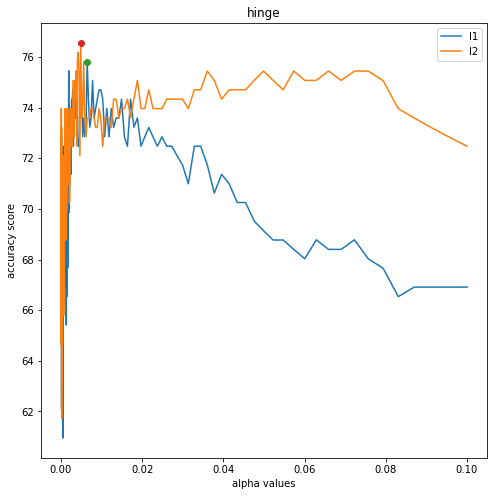

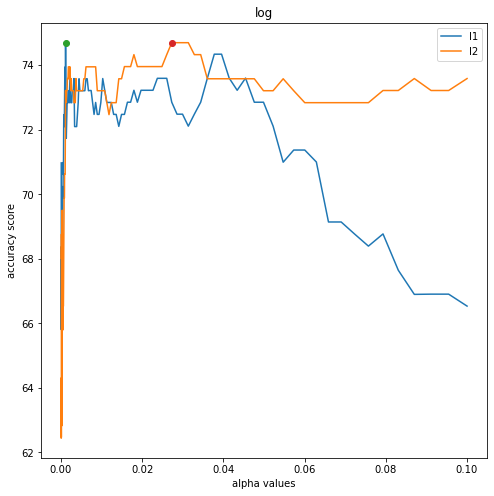

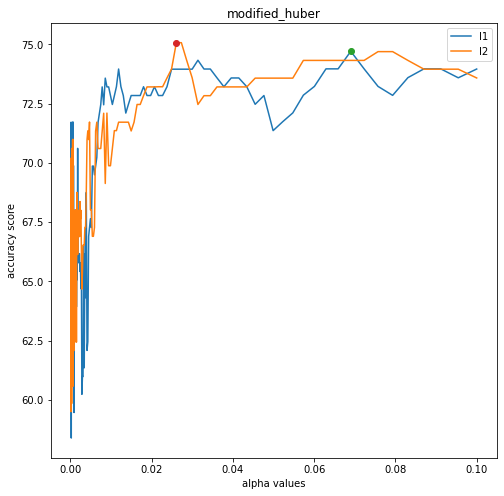

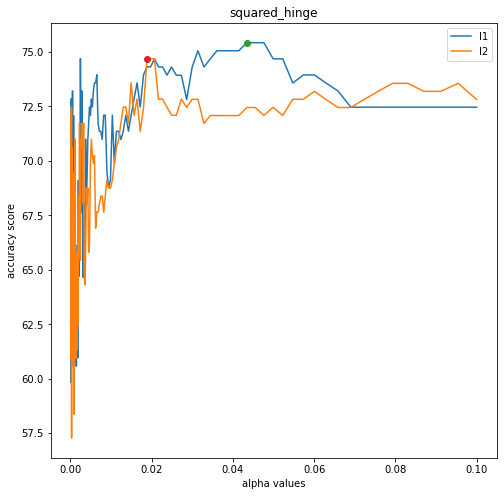

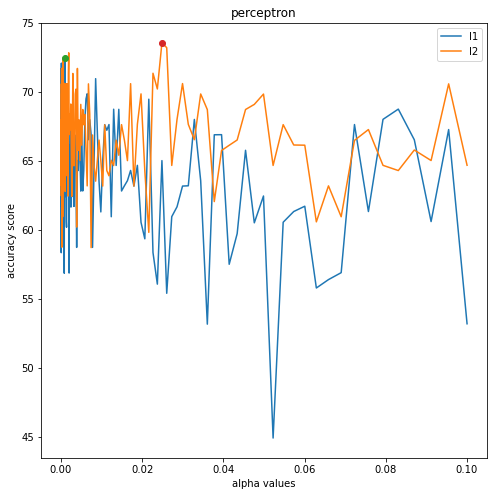

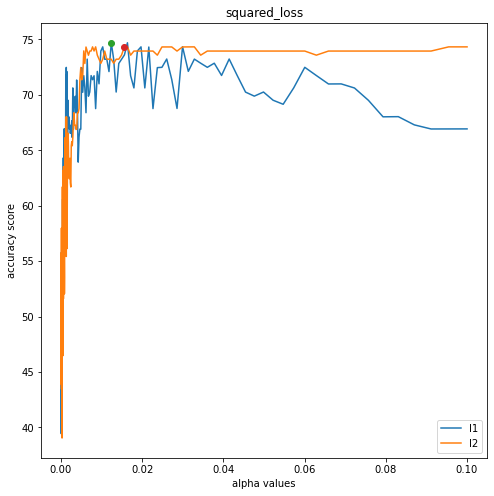

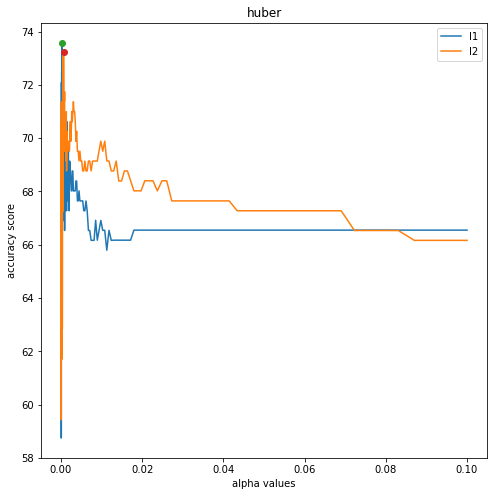

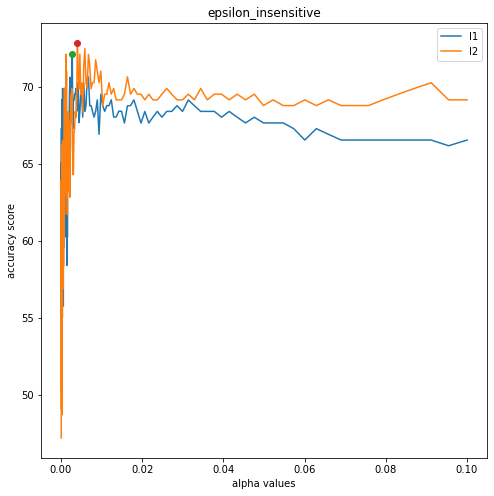

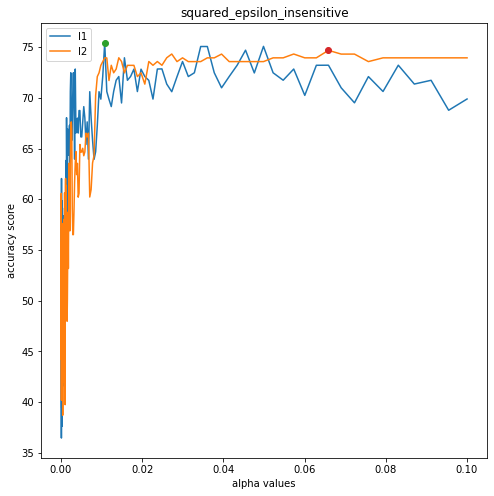

In [292]:
for i in range(len(loss)):
    plt.figure(i, figsize=(8, 8)) 
    plt.title(loss[i])
    plt.xlabel('alpha values')
    plt.ylabel('accuracy score')
    
    plt.plot(alpha_values,score_model[:, i][:, 0])
    plt.plot(alpha_values,score_model[:, i][:, 1])
    plt.legend(["l1","l2"])
    
    n_max1 = score_model[:, i][:, 0].argmax()
    plt.plot(alpha_values[n_max1],score_model[:, i][:, 0][n_max1],'o')
    n_max2 = score_model[:, i][:, 1].argmax()
    plt.plot(alpha_values[n_max2],score_model[:, i][:, 1][n_max2],'o')

In [293]:
score_train = np.amax(score_model)
index = np.where(score_model == score_train)

alphaWithMaxScore = alphaVal[index[0][0]]
lossWithMaxScore = loss_name[index[1][0]]
penaWithMaxScore = penal[index[2][0]]

print("score = ", score_train,  " alpha val = ", alphaWithMaxScore, " loss val = ", lossWithMaxScore, " pena val = ", penaWithMaxScore)

score =  76.56184486373164  alpha val =  0.00014563484775012445  loss val =  hinge  pena val =  l2


In [292]:
model_cv=  SGDClassifier(penalty='l2', alpha= 0.00014563484775012445 , random_state=5 ,loss='hinge' , max_iter=5000)
model_cv.fit(x_train,y_train)
model_cv.score(x_test,y_test)


0.7666666666666667